In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
workers = pd.read_excel("C:/Users/SHYAM/Desktop/Project_workers_Absentees/Absenteeism_at_work.xls", sep = ';')
print(workers.shape)

(740, 21)


In [3]:
col_names = ['id','reason_for_absence','month_of_absence','day_of_the_week','seasons','transportation_expense','distance_from_residence_to_work',
            'service_time','age','work_load_average/day','hit_target','disciplinary_failure','education','son','social_drinker','social_smoker',
             'pet','weight','height','body_mass_index','absenteeism_time_in_hours']

workers.columns = col_names
workers.head()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


# Basic EDA

In [4]:
workers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
id                                 740 non-null int64
reason_for_absence                 740 non-null int64
month_of_absence                   740 non-null int64
day_of_the_week                    740 non-null int64
seasons                            740 non-null int64
transportation_expense             740 non-null int64
distance_from_residence_to_work    740 non-null int64
service_time                       740 non-null int64
age                                740 non-null int64
work_load_average/day              740 non-null int64
hit_target                         740 non-null int64
disciplinary_failure               740 non-null int64
education                          740 non-null int64
son                                740 non-null int64
social_drinker                     740 non-null int64
social_smoker                      740 non-null int64
pet                            

In [5]:
cat_cols = ['id','reason_for_absence','month_of_absence','day_of_the_week','seasons']

for col in cat_cols:
    workers[col] = workers[col].astype('object')


In [6]:
workers.isna().sum()

id                                 0
reason_for_absence                 0
month_of_absence                   0
day_of_the_week                    0
seasons                            0
transportation_expense             0
distance_from_residence_to_work    0
service_time                       0
age                                0
work_load_average/day              0
hit_target                         0
disciplinary_failure               0
education                          0
son                                0
social_drinker                     0
social_smoker                      0
pet                                0
weight                             0
height                             0
body_mass_index                    0
absenteeism_time_in_hours          0
dtype: int64

In [7]:
workers.describe()

,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,221.329730,29.631081,12.554054,36.450000,271490.235135,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,66.952223,14.836788,4.384873,6.478772,39058.116188,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,260.000000,50.000000,16.000000,40.000000,294217.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [8]:
workers.head()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [9]:
workers['id'].unique()

array([11, 36, 3, 7, 10, 20, 14, 1, 24, 6, 33, 18, 30, 2, 19, 27, 34, 5,
       15, 29, 28, 13, 22, 17, 31, 23, 32, 9, 26, 21, 8, 25, 12, 16, 4,
       35], dtype=object)

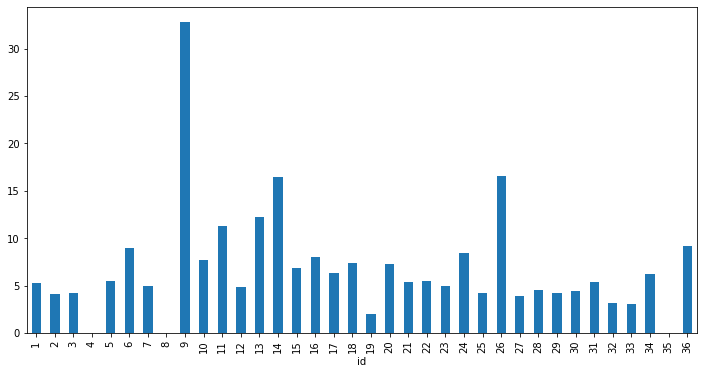

In [10]:
_ = workers.groupby('id')['absenteeism_time_in_hours'].mean().plot.bar()
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

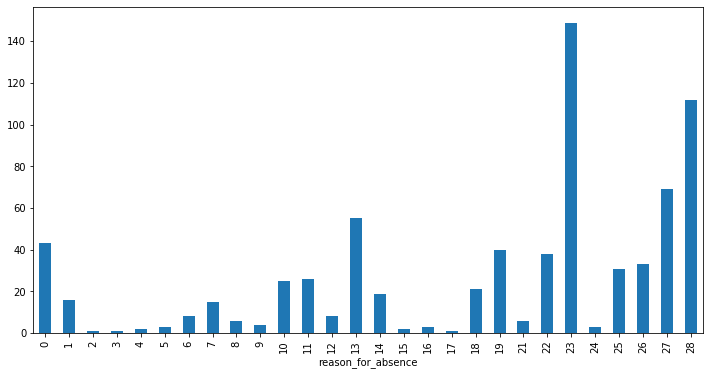

In [11]:
# Reason for more absentees
_ = workers.groupby('reason_for_absence')['id'].count().plot.bar()
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

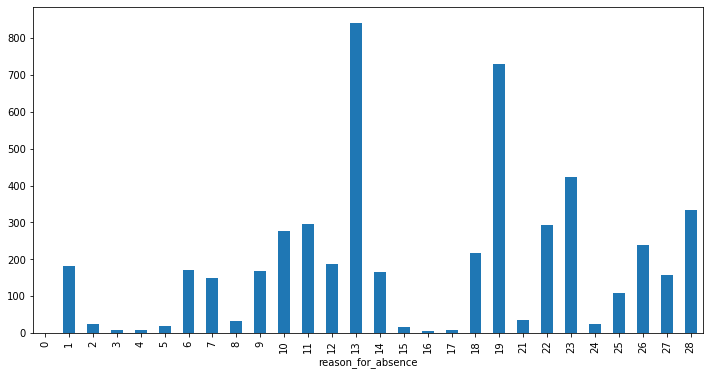

In [12]:
_ = workers.groupby('reason_for_absence')['absenteeism_time_in_hours'].sum().plot.bar()
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

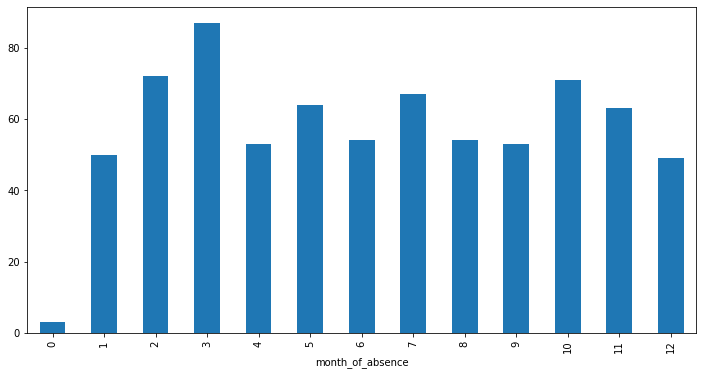

In [13]:
_ = workers.groupby('month_of_absence')['id'].count().plot.bar()
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

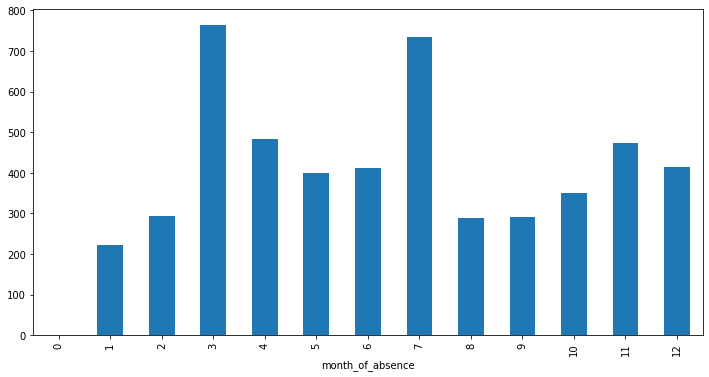

In [14]:
_ = workers.groupby('month_of_absence')['absenteeism_time_in_hours'].sum().plot.bar()
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

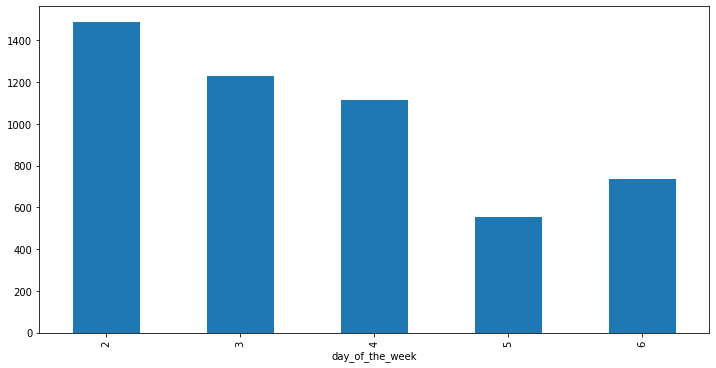

In [15]:
_ = workers.groupby('day_of_the_week')['absenteeism_time_in_hours'].sum().plot.bar()
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

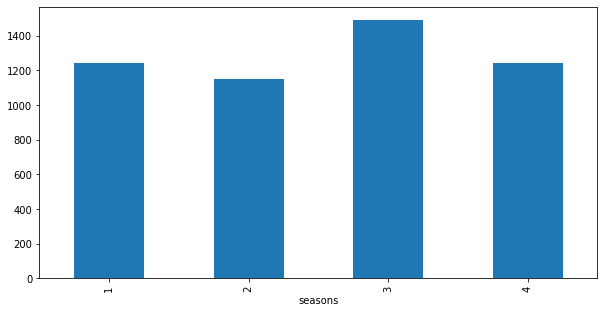

In [16]:
_ = workers.groupby('seasons')['absenteeism_time_in_hours'].sum().plot.bar()
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.show()

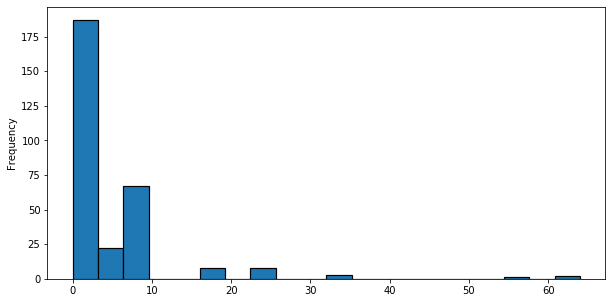

In [17]:
_ = workers[workers['son'] == 0]['absenteeism_time_in_hours'].plot.hist(edgecolor='black', linewidth=1.2, bins = 20)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.show()

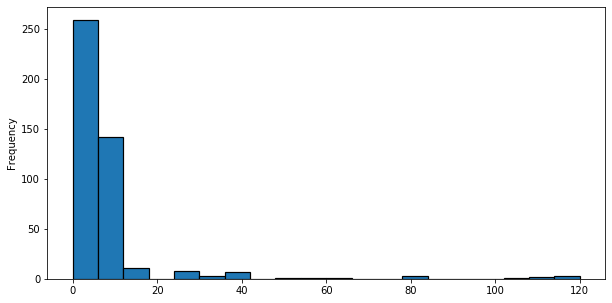

In [18]:
_ = workers[workers['son'] != 0]['absenteeism_time_in_hours'].plot.hist(edgecolor='black', linewidth=1.2, bins = 20)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.show()

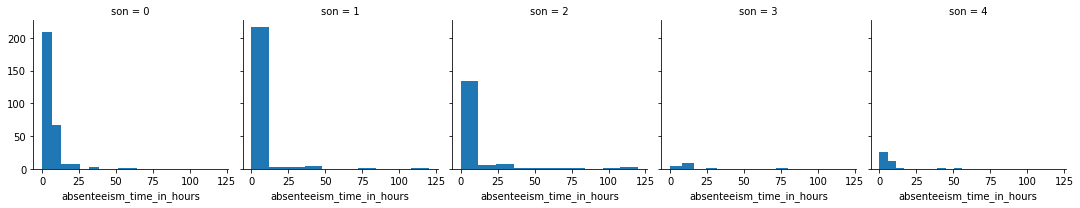

In [19]:
import seaborn as sns
c = sns.FacetGrid(data = workers, col = 'son')
c.map(plt.hist, "absenteeism_time_in_hours")
fig = plt.gcf()
fig.set_size_inches(15,3)
plt.show()

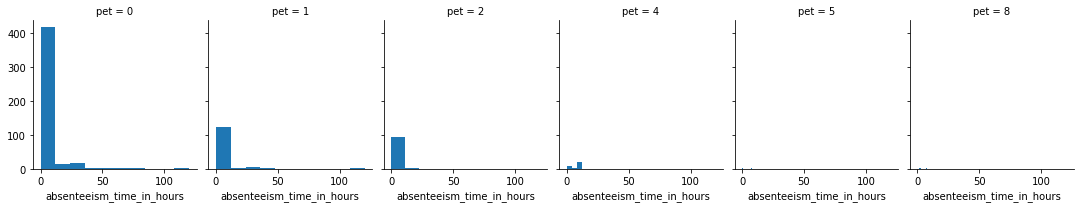

In [20]:
p = sns.FacetGrid(data = workers, col = 'pet')
p.map(plt.hist, "absenteeism_time_in_hours")
fig = plt.gcf()
fig.set_size_inches(15,3)
plt.show()

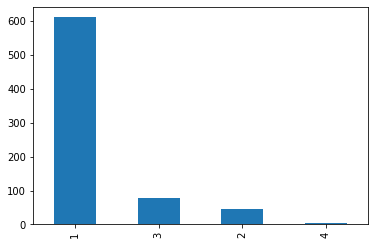

In [21]:
_ = workers.education.value_counts().plot.bar()
plt.show()

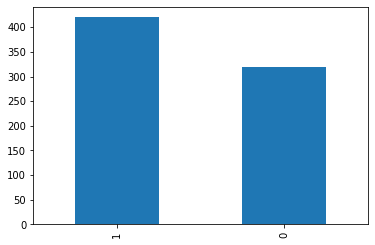

In [22]:
_ = workers.social_drinker.value_counts().plot.bar()
plt.show()

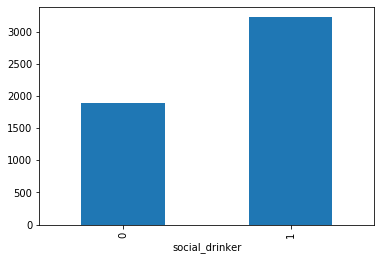

In [23]:
_ = workers.groupby('social_drinker')['absenteeism_time_in_hours'].sum().plot.bar()
plt.show()

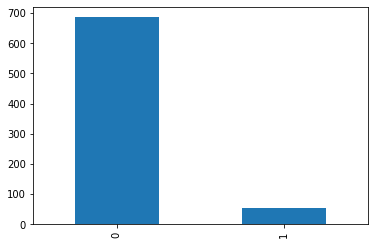

In [24]:
_ = workers.social_smoker.value_counts().plot.bar()
plt.show()

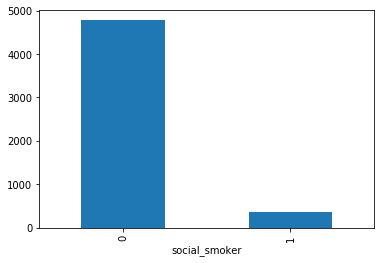

In [25]:
_ = workers.groupby('social_smoker')['absenteeism_time_in_hours'].sum().plot.bar()
plt.show()

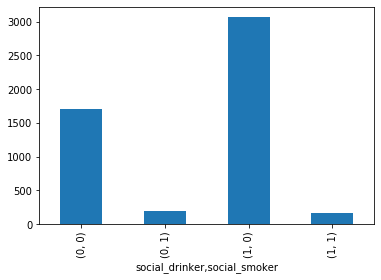

In [26]:
# plot for social smoker and drinker
_ = workers.groupby(['social_drinker','social_smoker'])['absenteeism_time_in_hours'].sum().plot.bar()
plt.show()

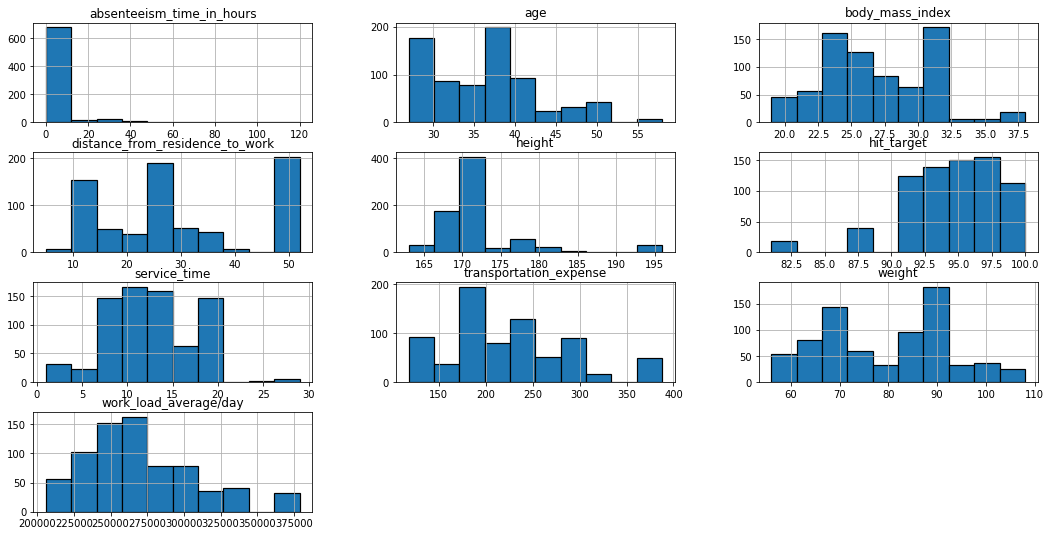

In [27]:
num_col = ['transportation_expense','distance_from_residence_to_work','service_time','age','work_load_average/day','hit_target',
          'weight','height','body_mass_index', 'absenteeism_time_in_hours']

_ = workers[num_col].hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(18,9)
plt.show()

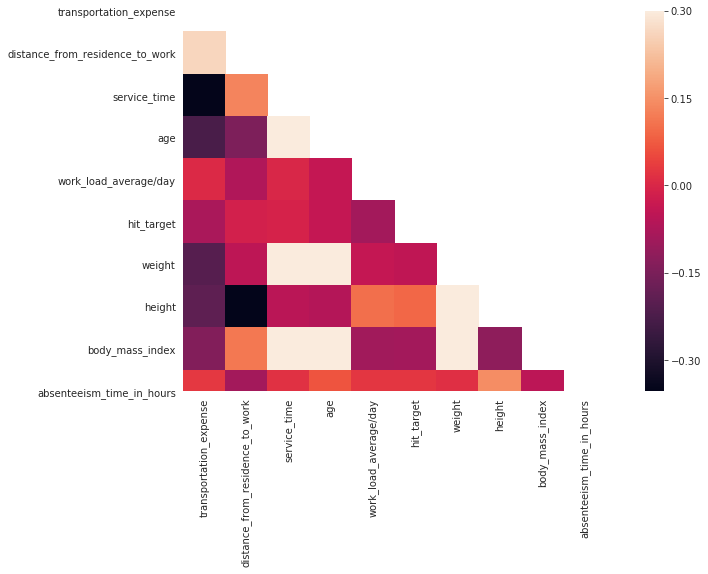

In [28]:
corr = workers[num_col].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)
fig = plt.gcf()
fig.set_size_inches(14,7)
plt.show()

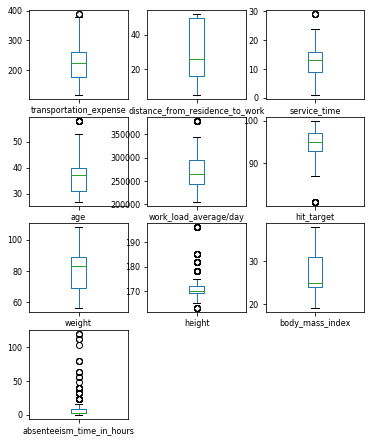

In [29]:
workers[num_col].plot(kind='box', subplots=True, layout=(8,3), sharex=False, sharey=False, fontsize=8)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 3,wspace=0.2, hspace=0.2)
plt.show()